**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



## Import data

In [6]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2"
)
txt_fname = "results.enrich.fcc_active_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary_v1 = dat
print(dim(dat))
head(dat)

[1] 2084    6


Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Enhancer,H2AFZ,35.764202,0.0000,1.6208491,0.000000000
Enhancer,H3K27ac,28.537164,0.0000,1.1127810,0.000000000
Enhancer,H3K27me3,-2.765306,0.0049,-1.0878141,0.005574017
Enhancer,H3K36me3,-14.052677,0.0000,-1.8813276,0.000000000
Enhancer,H3K4me1,22.520019,0.0000,0.6897697,0.000000000
Enhancer,H3K4me2,28.681501,0.0000,1.1229281,0.000000000


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_integration",
    "fcc_astarr_macs_input_overlap",
    "analysis_enrichment_v2",
    "fcc_starrmpra_vote2_v2_split_pool_by_tss"
)
txt_fname = "results.enrich.fcc_active_vs_inactive.perm_n10k.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_fit_summary_v2 = dat
print(dim(dat))
head(dat)

[1] 2084    6


Group,Feature,Stat,Pval,Score,Padj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Distal:Active,H2AFZ,45.036759,0,2.22870227,0
Distal:Active,H3K27ac,37.755824,0,1.70492830,0
Distal:Active,H3K27me3,-6.310267,0,-1.46508623,0
Distal:Active,H3K36me3,-17.250558,0,-2.25210593,0
Distal:Active,H3K4me1,15.026241,0,0.06981372,0
Distal:Active,H3K4me2,38.867563,0,1.78490428,0


## Arrange

In [13]:
fun_str_map = function(vec_txt_input){
    vec_txt_pattern = c("Enhancer", "Silencer", "TSS:Enhancer", "TSS:Silencer")
    vec_txt_replace = c("Distal:Active", "Distal:Repressive", "Proximal:Active", "Proximal:Repressive")
    vec_txt_output = fun_str_map_match(
        vec_txt_input,
        vec_txt_pattern,
        vec_txt_replace
    )
    return(vec_txt_output)
}

dat = dat_fit_summary_v1
dat = dat %>% dplyr::mutate(Note = fun_str_map(Group))
dat = dat %>% dplyr::mutate(Note = paste(Note, "(Original)"))

dat = dat %>% 
    dplyr::select(Note, Score, Feature) %>%
    tidyr::spread(Note, Score)

mat_fit_summary_v1 = dat
print(dim(dat))
head(dat, 3)

[1] 521   5


Feature,Distal:Active (Original),Distal:Repressive (Original),Proximal:Active (Original),Proximal:Repressive (Original)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ADNP,0.0334965,-0.3917924,-1.3517029,1.40896695
AFF1,0.7363873,1.7377852,0.9118609,-0.11484474
AFF4,-0.5878003,1.3894350,0.7446663,0.08706335


In [14]:
dat = dat_fit_summary_v2
dat = dat %>% dplyr::mutate(Note = Group)
dat = dat %>% dplyr::mutate(Note = paste(Note, "(Updated)"))

dat = dat %>% 
    dplyr::select(Note, Score, Feature) %>%
    tidyr::spread(Note, Score)

mat_fit_summary_v2 = dat
print(dim(dat))
head(dat, 3)

[1] 521   5


Feature,Distal:Active (Updated),Distal:Repressive (Updated),Proximal:Active (Updated),Proximal:Repressive (Updated)
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ADNP,-0.3393810,-0.6681893,-0.4835816,-0.5908073
AFF1,0.8897125,1.9023256,0.7145601,0.5975251
AFF4,-0.2733422,1.3168284,0.1230323,-1.0332922


## Correlation

In [19]:
dat = dplyr::inner_join(
    mat_fit_summary_v1,
    mat_fit_summary_v2,
    by = "Feature"
)
dat = dat %>% column_to_rownames("Feature")

head(dat)

,Distal:Active (Original),Distal:Repressive (Original),Proximal:Active (Original),Proximal:Repressive (Original),Distal:Active (Updated),Distal:Repressive (Updated),Proximal:Active (Updated),Proximal:Repressive (Updated)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ADNP,0.0334965,-0.3917924,-1.3517029,1.408966947,-0.3393810,-0.6681893,-0.48358159,-0.5908073
AFF1,0.7363873,1.7377852,0.9118609,-0.114844739,0.8897125,1.9023256,0.71456008,0.5975251
AFF4,-0.5878003,1.3894350,0.7446663,0.087063354,-0.2733422,1.3168284,0.12303230,-1.0332922
AGO1,-2.0571666,-0.8817062,-0.1047192,0.064772672,-1.7689214,-1.3036737,-1.48061482,0.4041109
ARHGAP35,-1.6621354,0.7598008,-0.6919002,0.007437697,-1.9515905,0.9158649,-0.59849034,0.5974532
ARID1B,1.6125474,-0.9264129,-2.1073090,-0.668621889,1.1521080,-1.5705961,-0.08985721,-1.0980627


In [20]:
dat = dplyr::inner_join(
    mat_fit_summary_v1,
    mat_fit_summary_v2,
    by = "Feature"
)
dat = dat %>% column_to_rownames("Feature")

cor(dat, method = "spearman")

,Distal:Active (Original),Distal:Repressive (Original),Proximal:Active (Original),Proximal:Repressive (Original),Distal:Active (Updated),Distal:Repressive (Updated),Proximal:Active (Updated),Proximal:Repressive (Updated)
Distal:Active (Original),1.00000000,-0.06851053,0.00395290,-0.08101836,0.95445167,-0.15638514,0.3026978,-0.1203193
Distal:Repressive (Original),-0.06851053,1.00000000,-0.14090472,0.12903338,-0.12348473,0.93394241,-0.1757190,0.1663300
Proximal:Active (Original),0.00395290,-0.14090472,1.00000000,-0.14010311,0.17825774,-0.03783515,0.6212686,-0.3078946
Proximal:Repressive (Original),-0.08101836,0.12903338,-0.14010311,1.00000000,-0.03012901,0.16848041,-0.3575914,0.5062804
Distal:Active (Updated),0.95445167,-0.12348473,0.17825774,-0.03012901,1.00000000,-0.17127014,0.3248162,-0.2022490
Distal:Repressive (Updated),-0.15638514,0.93394241,-0.03783515,0.16848041,-0.17127014,1.00000000,-0.1757242,0.1647775
Proximal:Active (Updated),0.30269783,-0.17571901,0.62126861,-0.35759142,0.32481616,-0.17572418,1.0000000,-0.1500099
Proximal:Repressive (Updated),-0.12031927,0.16632997,-0.30789460,0.50628043,-0.20224904,0.16477749,-0.1500099,1.0000000


In [25]:
vec1 = brewer.pal(n=6, name="Reds")
vec2 = brewer.pal(n=6, name="Blues")
vec  = c(rev(vec1), "#FFFFFF", vec2)
vec  = colorRampPalette(vec)(20)
vec  = rev(vec)
vec_txt_color = vec

In [26]:
library(corrplot)

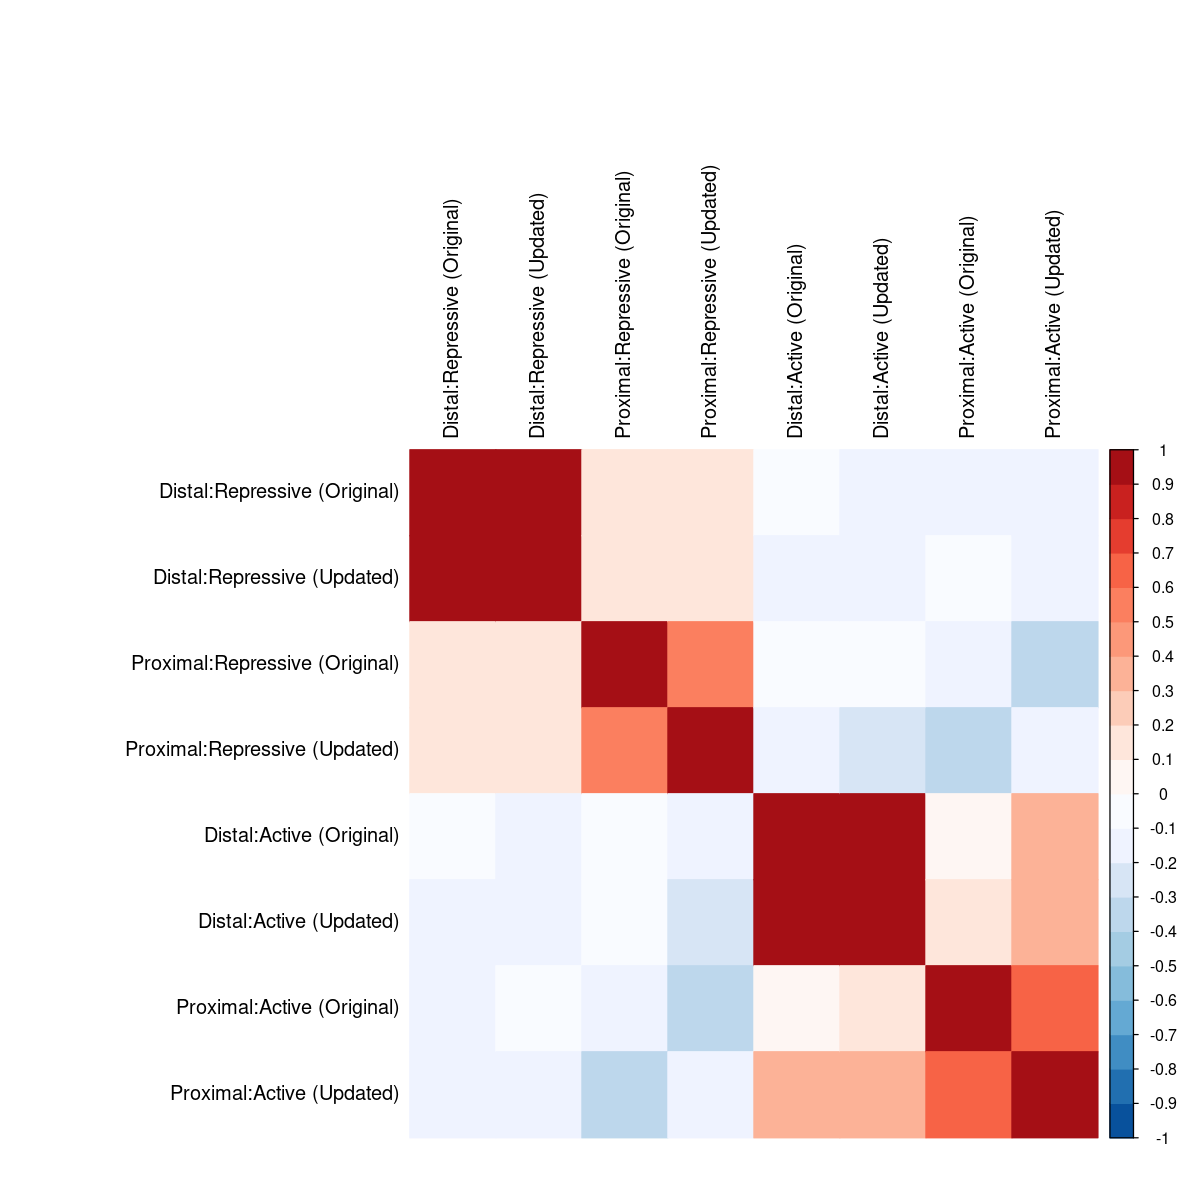

In [28]:
dat = dplyr::inner_join(
    mat_fit_summary_v1,
    mat_fit_summary_v2,
    by = "Feature"
)
dat = dat %>% column_to_rownames("Feature")
dat = cor(dat, method = "spearman")

# correlogram with hclust reordering
options(repr.plot.height = 10, repr.plot.width=10)
corrplot(
    dat, 
    method="color", 
    col=vec_txt_color, 
    tl.col="black",
    order="hclust"
) 